In [ ]:
!pip install gensim pyLDAvis==2.1.2 scikit-learn wordcloud
!python -m nltk.downloader stopwords wordnet

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Loading and Preprocessing**

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(f"Number of documents: {len(documents)}")

Number of documents: 18846


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

clean_docs = [preprocess(doc) for doc in documents]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Feature Extraction**

For K-Means → TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(clean_docs)

For LDA → Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
count = count_vectorizer.fit_transform(clean_docs)

**K-Means Clustering**

In [ ]:
num_clusters = 20
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf)

clusters = km.labels_

terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in km.cluster_centers_.argsort()[:, -10:][i]]
    print(f"Cluster {i}: {top_terms}")

Cluster 0: ['portable', 'please', 'cmos', 'incorrectly', 'diagnostics', 'configuration', 'byte', 'machine', 'diskette', 'compaq']
Cluster 1: ['assent', 'deny', 'god', 'alleged', 'church', 'lourdes', 'private', 'fatima', 'catholic', 'revelation']
Cluster 2: ['berlin', 'ext', 'bit', 'sys', 'support', 'booting', 'card', 'enabler', 'mb', 'boot']
Cluster 3: ['able', 'looking', 'called', 'youre', 'copy', 'check', 'exactly', 'checked', 'eric', 'pcxview']
Cluster 4: ['time', 'im', 'think', 'people', 'dont', 'get', 'like', 'know', 'one', 'would']
Cluster 5: ['god', 'spatout', 'believing', 'james', 'christian', 'lukewarm', 'deed', 'saved', 'roman', 'faith']
Cluster 6: ['specious', 'sodomite', 'opinons', 'largeely', 'jude', 'homosexuality', 'angel', 'lust', 'sodom', 'flesh']
Cluster 7: ['regularseason', 'nauseum', 'right', 'mr', 'president', 'cup', 'left', 'winner', 'middle', 'guy']
Cluster 8: ['side', 'harmon', 'sommer', 'usrensetcorganization', 'harmonsgyrowvtekcom', 'steer', 'left', 'neck', 'h

*LDA Topic Modeling*

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(count)

terms = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [terms[i] for i in topic.argsort()[-10:]])

Topic 0:  ['belief', 'say', 'believe', 'religion', 'christ', 'bible', 'one', 'christian', 'jesus', 'god']
Topic 1:  ['use', 'circuit', 'battery', 'stephanopoulos', 'dont', 'ground', 'wire', 'mr', 'power', 'one']
Topic 2:  ['software', 'also', 'get', 'system', 'version', 'image', 'use', 'program', 'window', 'file']
Topic 3:  ['also', 'doctor', 'cancer', 'study', 'health', 'medical', 'drug', 'patient', 'disease', 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax']
Topic 4:  ['one', 'last', 'hockey', 'season', 'would', 'db', 'year', 'player', 'team', 'game']
Topic 5:  ['clipper', 'phone', 'weapon', 'use', 'government', 'law', 'chip', 'would', 'key', 'gun']
Topic 6:  ['would', 'shuttle', 'moon', 'orbit', 'satellite', 'mission', 'launch', 'earth', 'system', 'space']
Topic 7:  ['time', 'thing', 'say', 'like', 'know', 'think', 'one', 'dont', 'would', 'people']
Topic 8:  ['general', 'privacy', 'university', 'administration', 'new', 'government', 'encryption', 'mr', 'technology', 'president']
Topic 9:  ['bos', 

**Visualizations**

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def save_wordclouds(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        terms = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(terms))

        plt.figure()
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {idx}")

        plt.savefig(f'wordcloud_topic_{idx}.png', bbox_inches='tight')
        plt.close()

save_wordclouds(lda, count_vectorizer.get_feature_names_out())



In [65]:
!zip -r wordclouds.zip wordcloud_topic_*.png
from google.colab import files
files.download('wordclouds.zip')

  adding: wordcloud_topic_0.png (deflated 1%)
  adding: wordcloud_topic_10.png (deflated 1%)
  adding: wordcloud_topic_11.png (deflated 1%)
  adding: wordcloud_topic_12.png (deflated 1%)
  adding: wordcloud_topic_13.png (deflated 1%)
  adding: wordcloud_topic_14.png (deflated 1%)
  adding: wordcloud_topic_15.png (deflated 1%)
  adding: wordcloud_topic_16.png (deflated 1%)
  adding: wordcloud_topic_17.png (deflated 1%)
  adding: wordcloud_topic_18.png (deflated 1%)
  adding: wordcloud_topic_19.png (deflated 1%)
  adding: wordcloud_topic_1.png (deflated 1%)
  adding: wordcloud_topic_2.png (deflated 1%)
  adding: wordcloud_topic_3.png (deflated 1%)
  adding: wordcloud_topic_4.png (deflated 1%)
  adding: wordcloud_topic_5.png (deflated 1%)
  adding: wordcloud_topic_6.png (deflated 1%)
  adding: wordcloud_topic_7.png (deflated 1%)
  adding: wordcloud_topic_8.png (deflated 1%)
  adding: wordcloud_topic_9.png (deflated 1%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_and_save_top_words(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:]
        top_terms = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]

        df = pd.DataFrame({'term': top_terms, 'weight': top_weights})
        sns.barplot(x='weight', y='term', data=df)
        plt.title(f"Topic {idx}")

        plt.savefig(f'bargraph_topic_{idx}.png', bbox_inches='tight')
        plt.close()

plot_and_save_top_words(lda, count_vectorizer.get_feature_names_out())



In [63]:
!zip -r bargraphs.zip bargraph_topic_*.png
from google.colab import files
files.download('bargraphs.zip')

  adding: bargraph_topic_0.png (deflated 18%)
  adding: bargraph_topic_10.png (deflated 18%)
  adding: bargraph_topic_11.png (deflated 18%)
  adding: bargraph_topic_12.png (deflated 17%)
  adding: bargraph_topic_13.png (deflated 17%)
  adding: bargraph_topic_14.png (deflated 17%)
  adding: bargraph_topic_15.png (deflated 17%)
  adding: bargraph_topic_16.png (deflated 18%)
  adding: bargraph_topic_17.png (deflated 17%)
  adding: bargraph_topic_18.png (deflated 18%)
  adding: bargraph_topic_19.png (deflated 17%)
  adding: bargraph_topic_1.png (deflated 18%)
  adding: bargraph_topic_2.png (deflated 17%)
  adding: bargraph_topic_3.png (deflated 19%)
  adding: bargraph_topic_4.png (deflated 17%)
  adding: bargraph_topic_5.png (deflated 17%)
  adding: bargraph_topic_6.png (deflated 18%)
  adding: bargraph_topic_7.png (deflated 17%)
  adding: bargraph_topic_8.png (deflated 17%)
  adding: bargraph_topic_9.png (deflated 17%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

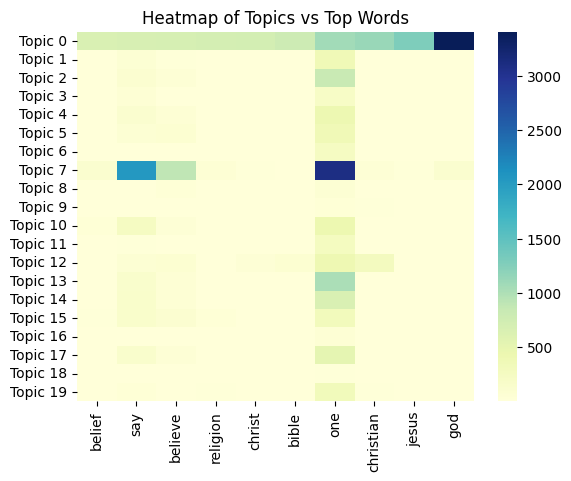

In [61]:
import numpy as np

top_n = 10
top_words = [count_vectorizer.get_feature_names_out()[i] for i in lda.components_[0].argsort()[-top_n:]]
heatmap_data = np.array([topic[lda.components_[0].argsort()[-top_n:]] for topic in lda.components_])

sns.heatmap(heatmap_data, yticklabels=[f"Topic {i}" for i in range(lda.n_components)], xticklabels=top_words, cmap="YlGnBu")
plt.title("Heatmap of Topics vs Top Words")

plt.savefig('heatmap.png', bbox_inches='tight')

from google.colab import files
files.download('heatmap.png')

plt.show()


**Evaluation**

Vectorizing text data using TF-IDF...
TF-IDF matrix shape: (18846, 5000)
Applying Truncated SVD for dimensionality reduction...
Reduced data shape: (18846, 100)
Calculating silhouette scores for different k values...
k=2, silhouette score=0.1385
k=3, silhouette score=0.0490
k=4, silhouette score=0.0430
k=5, silhouette score=0.0359
k=6, silhouette score=0.0382
k=7, silhouette score=0.0413
k=8, silhouette score=0.0534
k=9, silhouette score=0.0552
k=10, silhouette score=0.0520
k=11, silhouette score=0.0544
k=12, silhouette score=0.0562
k=13, silhouette score=0.0543
k=14, silhouette score=0.0576
k=15, silhouette score=0.0573
k=16, silhouette score=0.0598
k=17, silhouette score=0.0666
k=18, silhouette score=0.0657
k=19, silhouette score=0.0672
k=20, silhouette score=0.0690


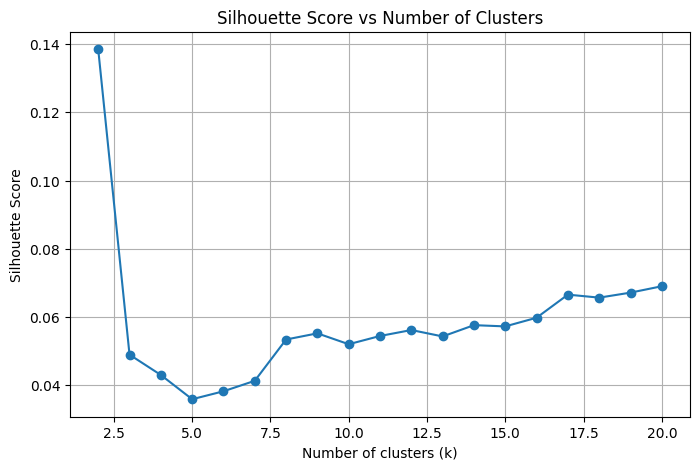

Best k based on silhouette score: 2
Final Silhouette Score: 0.1385


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

print("Vectorizing text data using TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(clean_docs)  # 'texts' = your list of documents

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

print("Applying Truncated SVD for dimensionality reduction...")
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_data = svd.fit_transform(tfidf_matrix)

print(f"Reduced data shape: {reduced_data.shape}")

print("Calculating silhouette scores for different k values...")
silhouette_scores = []
K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = K[np.argmax(silhouette_scores)]
print(f"Best k based on silhouette score: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans.fit_predict(reduced_data)

print(f"Final Silhouette Score: {max(silhouette_scores):.4f}")